In [ ]:
import os
import re
import zipfile

import numpy as np
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls

In [ ]:
def download_dataset(url):
  filename = "/content/gdrive/My Drive/CMPE 295A/kitti_dataset/labels.zip"
  keras.utils.get_file(filename, url)


  with zipfile.ZipFile(filename, "r") as z_fp:
      z_fp.extractall(extract_files_path)

In [ ]:
# Download training, testing dataset
download_dataset("https://s3.eu-central-1.amazonaws.com/avg-kitti/data_object_image_2.zip")
filename = "/content/gdrive/My Drive/CMPE 295A/kitti_dataset/data_object_image_2.zip"
extract_files_path = "/content/gdrive/My Drive/CMPE 295A/kitti_dataset/"

# Download lables
download_dataset("https://s3.eu-central-1.amazonaws.com/avg-kitti/data_object_label_2.zip")
filename = "/content/gdrive/My Drive/CMPE 295A/kitti_dataset/data_object_label_2.zip"
extract_files_path = "/content/gdrive/My Drive/CMPE 295A/kitti_dataset/lables/"

In [1]:
import warnings
warnings.simplefilter("ignore", Warning)

In [ ]:
!pip3 install http://download.pytorch.org/whl/cu92/torch-1.6.0-cp36-cp36m-linux_x86_64.whl
!pip3 install torchvision

In [ ]:
%cd gdrive/My\ Drive/KITTI-2d-object-detection-master/KITTI-2d-object-detection-master
!ls

In [15]:
#Train Kitti dataset using yolo3 model
!python '/content/gdrive/My Drive/KITTI-2d-object-detection-master/KITTI-2d-object-detection-master/src/main.py'

Available device =  cuda
Loading imagenet weights to darknet
Starting to train yolov3 model...
--------Epoch 1--------
100% 8/8 [00:04<00:00,  1.69it/s]
[Losses: x 0.381746, y 0.273926, w 3.969321, h 6.683018, conf 11.127802, cls 3.127298, total 25.563110, recall: 0.00000, precision: 0.00000]
Detecting objects: 100% 3/3 [00:03<00:00,  1.01s/it]
Computing AP for class '0': 100% 5/5 [00:00<00:00, 364.39it/s]
Computing AP for class '1': 100% 5/5 [00:00<00:00, 45789.34it/s]
Computing AP for class '2': 100% 5/5 [00:00<00:00, 43873.47it/s]
Computing AP for class '3': 100% 5/5 [00:00<00:00, 40642.48it/s]
Computing AP for class '4': 100% 5/5 [00:00<00:00, 45990.18it/s]
Computing AP for class '5': 100% 5/5 [00:00<00:00, 52428.80it/s]
Computing AP for class '6': 100% 5/5 [00:00<00:00, 56987.83it/s]
Computing AP for class '7': 100% 5/5 [00:00<00:00, 54189.97it/s]
+ Class '0' - AP: 0.0
+ Class '1' - AP: 0.0
+ Class '2' - AP: 0
+ Class '3' - AP: 0.0
+ Class '4' - AP: 0
+ Class '5' - AP: 0.0
+ Class

In [19]:
# test images using best kitti weights
!python '/content/gdrive/My Drive/KITTI-2d-object-detection-master/KITTI-2d-object-detection-master/src/detect.py'

Cuda available for inference
data size : 3

Performing object detection:
[tensor([[ 21.5474, 205.9159, 113.0179, 240.7029,   1.0000,   1.0000,   0.0000],
        [  1.1794, 206.6229,  47.6725, 229.4004,   1.0000,   1.0000,   0.0000],
        [ 73.2683, 204.2279, 181.2094, 250.3992,   1.0000,   1.0000,   0.0000]],
       device='cuda:0'), tensor([[141.9707, 205.2726, 184.8154, 219.6413,   1.0000,   1.0000,   0.0000],
        [162.0107, 206.6191, 264.7028, 259.9315,   1.0000,   1.0000,   0.0000],
        [ 52.6686, 207.2582,  83.1373, 224.3991,   1.0000,   0.9982,   0.0000],
        [226.8195, 208.0893, 366.5949, 266.0288,   1.0000,   0.9999,   0.0000],
        [123.1199, 203.8063, 143.3600, 213.9425,   0.9997,   1.0000,   0.0000],
        [130.3084, 204.4779, 165.5894, 215.7754,   0.9986,   1.0000,   0.0000],
        [157.1473, 206.0860, 202.0513, 224.0560,   0.9921,   1.0000,   0.0000]],
       device='cuda:0')]
	+ Batch 0, Inference Time: 0:00:00.486254
[tensor([[222.5808, 207.0140, 2

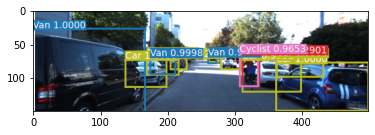

In [27]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
%matplotlib inline 
# Read Images 
img = mpimg.imread('/content/gdrive/My Drive/KITTI-2d-object-detection-master/KITTI-2d-object-detection-master/output/5.png') 
  
# Output Images 
plt.imshow(img) 